## Signal averaging

Signal averaging is a signal processing technique that tries to remove unwanted random disturbances from a signal through the process of averaging.

Averaging often takes the form of summing a series of signal samples and then dividing that sum by the number of individual samples.

The following equation represents a N-point moving average filter, with input the array `x` and outputs the averaged array `y`.

![Average_Filter3.png](../Images/Average_Filter_new2.png)

Let's see an example. Let's apply a 3-point moving average filter example. In this example, the input is the array `values` and the averaged output the array `averages`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

values = np.array([3., 9., 3., 4., 5., 2., 1., 7., 9., 1., 3., 5., 4., 9., 0., 4., 2., 8., 9., 7.])
N = 3

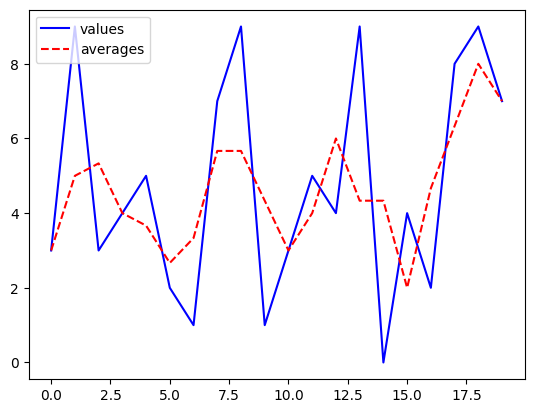

In [2]:
averages = np.empty(20)
for i in range(1, 19):
    temp = (values[i-1]+values[i]+values[i+1])/N
    averages[i] = temp

# Preserve the edge values
averages[0] = values[0]
averages[19] = values[19]  

plt.plot(values, 'b-', label='values')
plt.plot(averages, 'r--', label='averages')
plt.legend(loc="upper left")

We can also use numpy.convolve or scipy.ndimage.uniform_filter1d, for example, to implement the moving average filter.

This is an example using numpy.convolve:

[0.33333333 0.33333333 0.33333333]


Text(0.5, 0, 'Index')

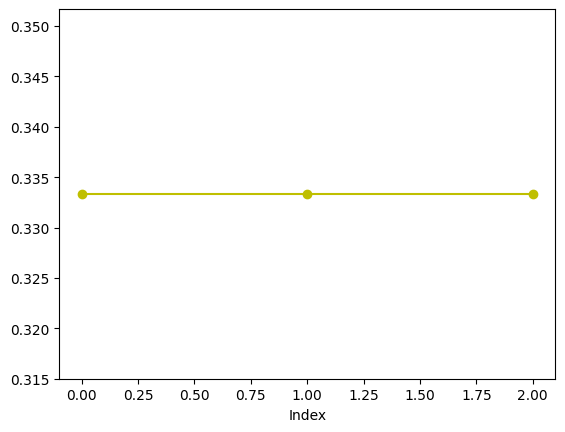

In [3]:
window = np.ones(3)
window /= sum(window)
print(window)
plt.plot(window, 'yo-')
plt.xlabel('Index')

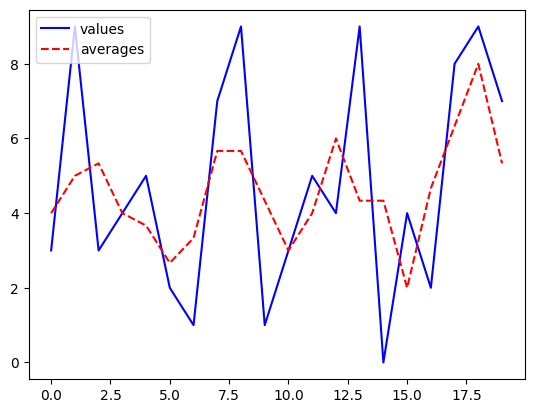

In [4]:
averages = np.convolve(values, window, mode='same')
plt.plot(values, 'b-', label='values')
plt.plot(averages, 'r--', label='averages')
plt.legend(loc="upper left")

This is an example using scipy.ndimage.uniform_filter1d:

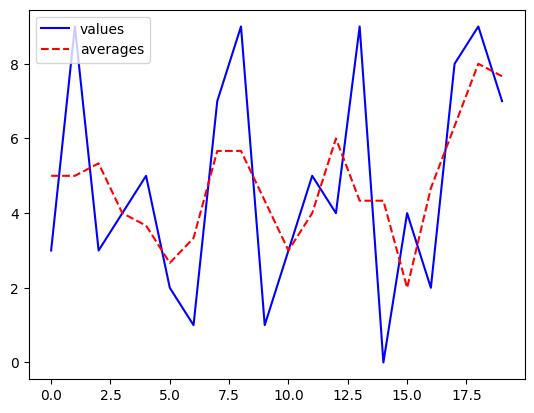

In [6]:
from scipy.ndimage import uniform_filter1d

averages = uniform_filter1d(values, size=3)
plt.plot(values, 'b-', label='values')
plt.plot(averages, 'r--', label='averages')
plt.legend(loc="upper left")

## Implementation of an averaging low-pass filter

In signal processing, the moving average filter can be used as a simple low-pass filter. The moving average filter smooths out a signal, removing the high frequency components from it, and this is what a low-pass filter does.

In this example, we are going to apply a low-pass filter (a 15-point moving average filter) to a square wave.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import SquareSignal, Wave

# Suppress scientific notation for small numbers
np.set_printoptions(precision=3, suppress=True)

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=48000)
wave.make_audio()

Let's make a moving average window.

[0.067 0.067 0.067 0.067 0.067 0.067 0.067 0.067 0.067 0.067 0.067 0.067
 0.067 0.067 0.067]


Text(0.5, 0, 'Index')

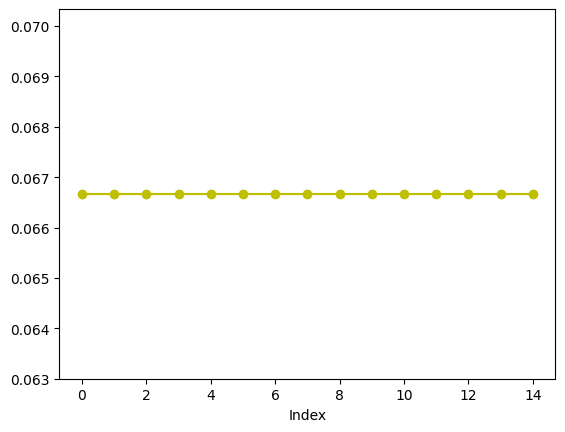

In [11]:
window = np.ones(15)
window /= sum(window)
print(window)
plt.plot(window, 'yo-')
plt.xlabel('Index')

Text(0.5, 0, 'Samples')

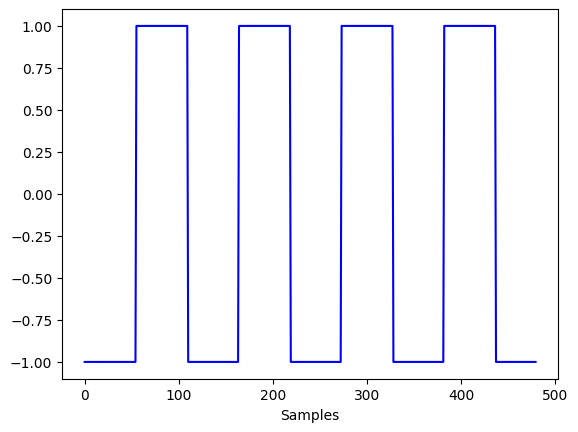

In [12]:
segment = wave.segment(duration=0.01)
plt.plot(segment.ys, 'b-')
plt.xlabel('Samples')

Apply the window to the signal.

Compute the smoothed wave using `np.convolve`.

In [13]:
averages = np.convolve(wave.ys, window, mode='same')
smooth = Wave(averages, framerate=wave.framerate)
smooth.make_audio()

Plot the result of the convolution and the original.

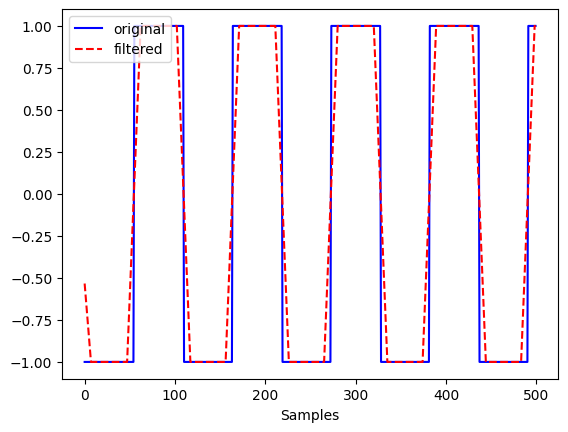

In [14]:
plt.plot(wave.ys[:500],'b-', label='original')
plt.plot(smooth.ys[:500], 'r--', label='filtered')
plt.xlabel('Samples')
plt.legend(loc="upper left")

Text(0.5, 1.0, 'Filtered')

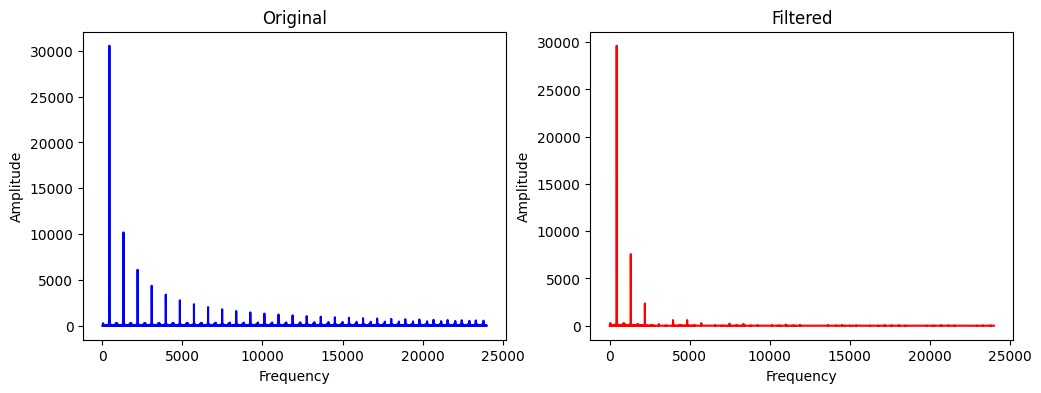

In [15]:
# Changes the default size of the plots
plt.rcParams["figure.figsize"] = [12, 4]

original_spectrum = wave.make_spectrum()
smooth_spectrum = smooth.make_spectrum()
plt.subplot(1,2,1)
plt.plot(original_spectrum.amps, 'b-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Original')
plt.subplot(1,2,2)
plt.plot(smooth_spectrum.amps,'r-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Filtered')

To see how much each component has been attenuated, we can compute the ratio of the two spectrums

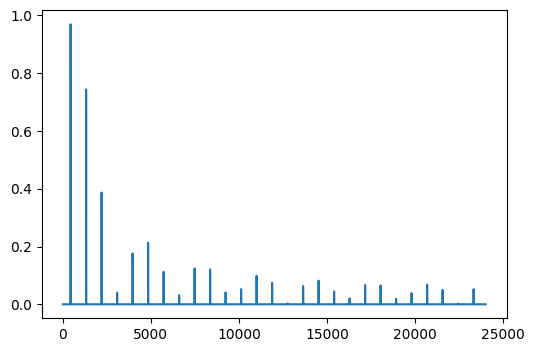

In [16]:
# Changes the default size of the plots
plt.rcParams["figure.figsize"] = [6, 4]

amps = original_spectrum.amps
amps2 = smooth_spectrum.amps
ratio = amps2/amps
ratio[amps<560] = 0
plt.plot(ratio)

Let's apply the filter to a pre-recorded sound.

In [18]:
from thinkdsp import read_wave
my_sound = read_wave('./320952__kevcio__amen-break-f-180-bpm-16-bars.wav')
my_sound.make_audio()

In [19]:
averages = np.convolve(my_sound.ys, window, mode='same')
smooth_violin = Wave(averages, framerate=my_sound.framerate)
smooth_violin.make_audio()

Text(0.5, 1.0, 'Filtered')

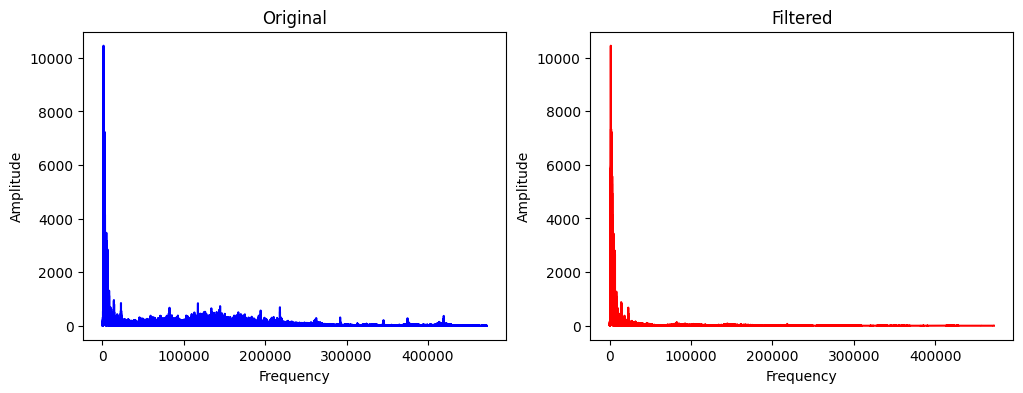

In [20]:
# Changes the default size of the plots
plt.rcParams["figure.figsize"] = [12, 4]

original_spectrum = my_sound.make_spectrum()
smooth_spectrum = smooth_violin.make_spectrum()
plt.subplot(1,2,1)
plt.plot(original_spectrum.amps, 'b-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Original')
plt.subplot(1,2,2)
plt.plot(smooth_spectrum.amps,'r-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Filtered')

Note: This lab is based on examples from [Think DSP](https://greenteapress.com/thinkdsp/thinkdsp.pdf) by Allen B. Downey.